В качестве домашнего задания вам предлагается поработать над предсказанием погоды. Файл с данными вы найдете в соответствующей директории. Вам будет доступен датасет weather.csv, ПЕРВЫЕ 75% (shuffle = False) которого нужно взять для обучения, последние 25% - для тестирования.

Требуется построить 4 модели которые будут предсказывать целевую переменную <b>RainTomorrow</b> с помощью:

   1. логистической регрессии [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
   
   2. метода ближайших соседей [sklearn.neighbors](https://scikit-learn.org/stable/modules/neighbors.html)

   3. Байесовского классификатора [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
   
   4. логистической регрессии реализованной самостоятельно

Затем следует сравнить результаты моделей (по качеству и времени выполнения) и сделать вывод о том, какая модель и с какими параметрами даёт лучшие результаты.

Не забывайте о том, что работа с признаками играет очень большую роль в построении хорошей модели.

Краткое описание данных:

    Date - Дата наблюдений
    Location - Название локации, в которой расположена метеорологическая станция
    MinTemp - Минимальная температура в градусах цельсия
    MaxTemp - Максимальная температура в градусах цельсия
    Rainfall - Количество осадков, зафиксированных за день в мм
    Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
    Sunshine - Число солнечных часов за день
    WindGustDir - направление самого сильного порыва ветра за последние 24 часа
    WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
    WindDir9am - направление ветра в 9 утра

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
X = pd.read_csv('weather.csv')

In [ ]:
y = X.RainTomorrow.replace({'No':0, 'Yes': 1})

In [ ]:
del X['RainTomorrow']

In [ ]:
X

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No
142189,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
142190,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
142191,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No


#EDA

In [ ]:
X = X.replace({'Yes': 1, 'No': 0})

In [ ]:
num_feats = X.select_dtypes(include = np.number)
cat_feats = X.select_dtypes(include = np.object)

При обучении модели можно не учитывать дату из таблицы, так как при условии поставленной задачи она не влияет на вероятность осадков завтрашнего дня (независимые события).

In [ ]:
cat_feats = cat_feats.drop(columns = 'Date')

Посчитаем количество потерянных значений в исходных данных

In [ ]:
def missing_values(x):
        # Всего пропущено значений
        mis_val = x.isnull().sum()

        # Процент пропущенных значений
        mis_val_percent = 100 * x.isnull().sum() / len(x)

        # Составляем таблицу пропущенных результатов
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Отсутствующие данные', 1 : '% от всех данных'})

        # Сортировка
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                '% от всех данных', ascending=False).round(2)

        print (str(mis_val_table_ren_columns.shape[0]) +
               ' колонок из ' + str(x.shape[1]) + ' повреждено.')
        return mis_val_table_ren_columns

In [ ]:
missing_values(X)

20 колонок из 23 повреждено.


,Отсутствующие данные,% от всех данных
Sunshine,67816,47.69
Evaporation,60843,42.79
Cloud3pm,57094,40.15
Cloud9am,53657,37.74
Pressure9am,14014,9.86
Pressure3pm,13981,9.83
WindDir9am,10013,7.04
WindGustDir,9330,6.56
WindGustSpeed,9270,6.52
WindDir3pm,3778,2.66


Оценим распределение числовых значений

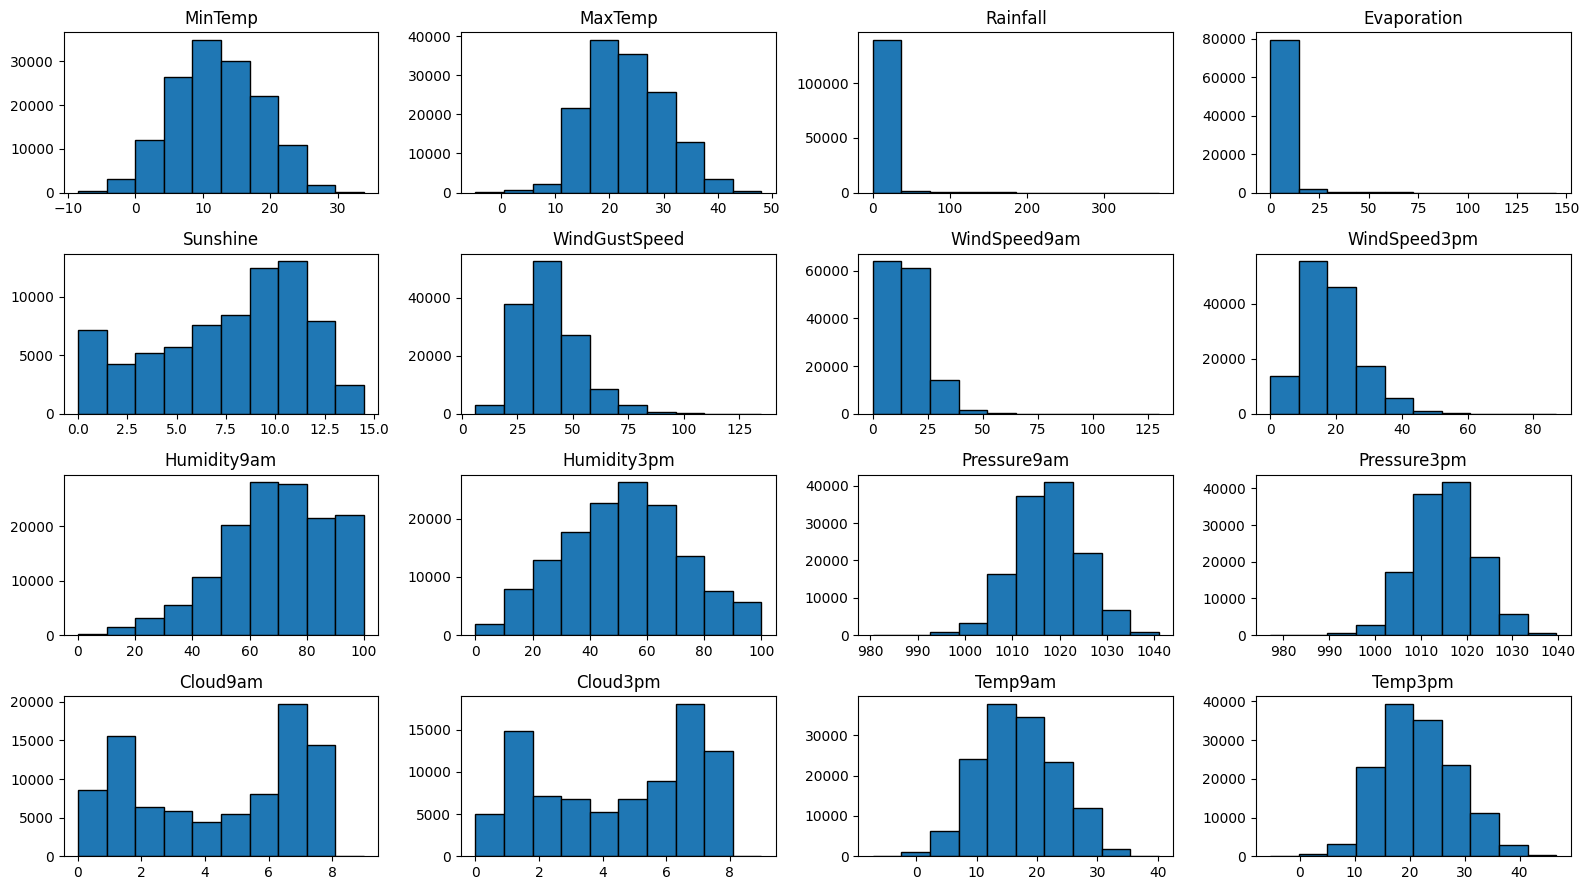

In [ ]:
%matplotlib inline
plt.figure(figsize = (16, 9))

for i in range(1, num_feats.shape[1] - 1):
  plt.subplot(4, 4, i)
  plt.hist(num_feats.iloc[:, i], bins = 10, edgecolor = 'k')
  plt.title(num_feats.columns[i])
plt.tight_layout()
plt.show()

Заполним пропуски в данных медианой, если в признаке есть выбросы, иначе — средним значением. Это позволит использовать ранее невалидные значения из таблицы без серьёзного искажения статистики.

In [ ]:
column_mean=[]
column_median=[]
b = 0.75
for i in num_feats:
  IQR = num_feats[i].quantile(0.75) - num_feats[i].quantile(0.25)
  less = num_feats[i].quantile(0.25) - 1.5*IQR < num_feats[i]
  more = num_feats[i] < num_feats[i].quantile(0.75) + 1.5*IQR
  if sum(less * more) / len(num_feats[i]) > b:
    column_mean.append(i)
  else:
    column_median.append(i)

In [ ]:
num_feats_mean = num_feats[column_mean].fillna(num_feats[column_mean].mean())
num_feats_median = num_feats[column_median].fillna(num_feats[column_median].median())

In [ ]:
num_feats_processed = pd.concat([num_feats_mean, num_feats_median], axis=1)

In [ ]:
cat_feats_processed = pd.get_dummies(cat_feats)

In [ ]:
X_processed = pd.concat([num_feats_processed, cat_feats_processed], axis=1)

Найдём коррелирующие признаки. Возможно будет полезно не учитывать те, которые имеют взаимосвязь.

In [ ]:
correlations_data = X_processed.corr()

In [ ]:
np.fill_diagonal(correlations_data.values, 0)

In [ ]:
correlations_data.iloc[np.where(abs(correlations_data) > 0.85)]

,Temp9am,Temp9am,Temp3pm,Pressure3pm,Pressure9am,MinTemp,MaxTemp,MaxTemp
MinTemp,0.897999,0.897999,0.699828,-0.434034,-0.424357,0.000000,0.733919,0.733919
MaxTemp,0.880087,0.880087,0.969735,-0.397422,-0.309093,0.733919,0.000000,0.000000
MaxTemp,0.880087,0.880087,0.969735,-0.397422,-0.309093,0.733919,0.000000,0.000000
Pressure9am,-0.397763,-0.397763,-0.266308,0.959878,0.000000,-0.424357,-0.309093,-0.309093
Pressure3pm,-0.442144,-0.442144,-0.361308,0.000000,0.959878,-0.434034,-0.397422,-0.397422
Temp9am,0.000000,0.000000,0.846931,-0.442144,-0.397763,0.897999,0.880087,0.880087
Temp9am,0.000000,0.000000,0.846931,-0.442144,-0.397763,0.897999,0.880087,0.880087
Temp3pm,0.846931,0.846931,0.000000,-0.361308,-0.266308,0.699828,0.969735,0.969735


Можно заметить, что максимальное и минимальное значения температуры достигаются как правило в определённое время. А также давление в 9 часов и 3 часа имеют взаимосвязь.

In [ ]:
X_processed = X_processed.drop(columns = ['Temp9am', 'Temp3pm', 'Pressure9am'])

#Генерация признаков

Разделим данные на обучающую и тестовую части.

In [ ]:
X_feat_train, X_feat_test, y_feat_train, y_feat_test = train_test_split(X_processed, y, shuffle = False, test_size = 0.25)

Масштабируем данные для линейных моделей.

In [ ]:
ss = StandardScaler()
X_feat_train_scaled = ss.fit_transform(X_feat_train)
X_feat_test_scaled = ss.transform(X_feat_test)

Проверка дисбаланса классов.

In [ ]:
y.value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

#Задание

### Реализация логистической регрессии
__Логистическая регрессия__

$$p(y|x) = a(x, \theta) = \sigma(\langle x, \theta \rangle) = \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}$$

In [ ]:
theta = np.array([1, 2, 3])

X =  np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
              ])

y = np.array([1, 1, 0, 0])

In [ ]:
def probability(theta, X):
    # YOUR CODE HERE
    result = 1 / (1 + np.exp(-np.sum(theta * X, axis=1)))
    return result
prob = probability(theta, X)

assert type(prob) == np.ndarray, 'Возвращается неверный тип'
assert prob.shape == (X.shape[0],), 'Неверный размер массива'
assert (prob.round(3) == [0.998, 0.119, 0.731, 0.]).all(), 'Функция считается неверно'

Функция предсказания метки класса, получает на вход вероятности принадлежности к классу 1 и выдает метки классов $y \in \{0, 1\}$

In [ ]:
def binary_class_prediction(theta, X, threshold =.5):
    prob =  probability(theta, X)
    # YOUR CODE HERE
    result = np.array([1 if x >= threshold else 0 for x in prob])
    return result

y_pred = binary_class_prediction(theta, X)


assert type(y_pred) == np.ndarray, 'Возвращается неверный тип'
assert y_pred.shape == (X.shape[0],), 'Неверный размер массива'
assert min(y_pred) == 0, 'Функция считается неверно'
assert max(y_pred) == 1, 'Функция считается неверно'

__Функционал качества логистической регрессии__

Запишем правдободовие выборки для меток класса $y \in \{+1, -1\}$

$$Likelihood(a, X^\ell) = \prod_{i = 1}^{\ell} a(x_i,\theta)^{[y_i = +1]} (1 - a(x_i, \theta))^{[y_i = -1]} → \operatorname*{max}_{\theta}$$

Прологарифмируем правдоподобие выборки и перейдем к задаче минимизации:

$$Q(a, X^\ell) =     -\sum_{i = 1}^{\ell}
        [y_i = +1] \log a(x_i, \theta)
        +
        [y_i = -1] \log (1 - a(x_i, \theta)) \to \operatorname*{min}_{\theta}$$
        
Подставим $a(x, \theta)$ в функцинал качества:

$$ Q(a, X^\ell) = -\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{\exp(-\langle \theta, x_i \rangle)}{1 + \exp(-\langle \theta, x_i \rangle)}
\right)
=\\
=
-\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{1}{1 + \exp(\langle \theta, x_i \rangle)}
\right)
=\\
=
\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) $$
    

Итоговый оптимизируемый функционал качества (logloss), записанный для меток классов $y \in \{+1, -1\}$ и усредненный по выборке

$$
Q(a, X^\ell) = \frac{1}{\ell}\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) \to \operatorname*{min}_{\theta}
$$

Реализуем его в функции logloss:

In [ ]:
def logloss(theta, X, y):
    # YOUR CODE HERE
    y_zero_loss = y * np.log(probability(theta, X))
    y_one_loss = (1 - y) * np.log(1 - probability(theta, X))
    result = -np.mean(y_zero_loss + y_one_loss)
    return result

In [ ]:
assert logloss(theta, X, y).round(3) == 0.861, 'Функция считается неверно'

__Алгоритм оптимизации функционала качества. Стохастический градиентный спуск__

<b>Вход: </b> Выборка $X^\ell$, темп обучения $h$

<b>Выход: </b> оптимальный вектор весов $\theta$

1.  Инициализировать веса $\theta$
2.  Инициализировать оценку функционала качества: $Q(a, X^\ell)$
3.  <b>Повторять</b>:

    Выбрать случайным образом подвыборку объектов $X^{batch} =\{x_1, \dots,x_n \}$ из $X^{\ell}$
    
    Рассчитать градиент функционала качества: $\nabla Q(X^{batch}, \theta)$
    
    Обновить веса: $\theta := \theta - h\cdot \nabla Q(X^{batch}, \theta)$
       
    <b>Пока</b> значение $Q$ и/или веса $\theta$ не сойдутся   

Реализуем функцию рассчета градиента функционала качества

$$
\frac{\partial Q(a, X^{batch})} {\partial \theta_j} = \frac{\partial \frac{1}{n}\sum_{i = 1}^{n} \log \left( 1 + \exp(- y_i \langle \theta, x_i \rangle) \right)} {\partial \theta_j} = \frac{1}{n}\sum_{i = 1}^{n} \frac {1}{ 1 + \exp(- y_i \langle \theta, x_i \rangle)} \cdot \exp(- y_i \langle \theta, x_i \rangle) \cdot -y_i x_{ij}
$$

Реализуйте рассчет градиента в матричном виде:

In [ ]:
def gradient(theta, X, y):
    # YOUR CODE HERE
    diff =  probability(theta, X) - y
    result = np.array([np.mean(i) for i in np.matmul(X.transpose(), diff)])
    return result

assert gradient(theta, X, y).shape == theta.shape, 'Неверный размер массива'

Функция обучения уже реализована

In [ ]:
def fit(X, y, batch_size=10, h=0.05,  iters=100, plot=True):

    # получаем размерности матрицы
    size, dim = X.shape

    # случайная начальная инициализация
    theta = np.random.uniform(size=dim)

    errors = []

    theta_history = theta
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]

    # plt
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')


    for _ in range(iters):

        # берём случайный набор элементов
        batch = np.random.choice(size, batch_size, replace=False)
        X_batch = X[batch]
        y_batch = y[batch]

        # считаем производные
        grad = gradient(theta, X_batch, y_batch)

        assert type(grad) == np.ndarray, 'неверный тип'
        assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
        assert grad.shape[0] == len(theta), 'длина вектора должна быть равной количеству весов'


        # Обновляем веса

        theta -= grad * h

        theta_history = np.vstack((theta_history, theta))

        # error
        loss = logloss(theta, X, y)
        errors.append(loss)

        if plot:
            ax1.clear()
            ax1.scatter(range(dim), theta, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('theta')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')


            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('logloss')
            ax2.set_xlabel('itarations')

            ax3.plot(theta_history)
            ax3.set_title('update theta')
            ax3.set_ylabel('value')
            ax3.set_xlabel('itarations')
            time.sleep(0.05)
            fig.canvas.draw()

    return theta

In [ ]:
X, y = make_classification(n_samples=2000)

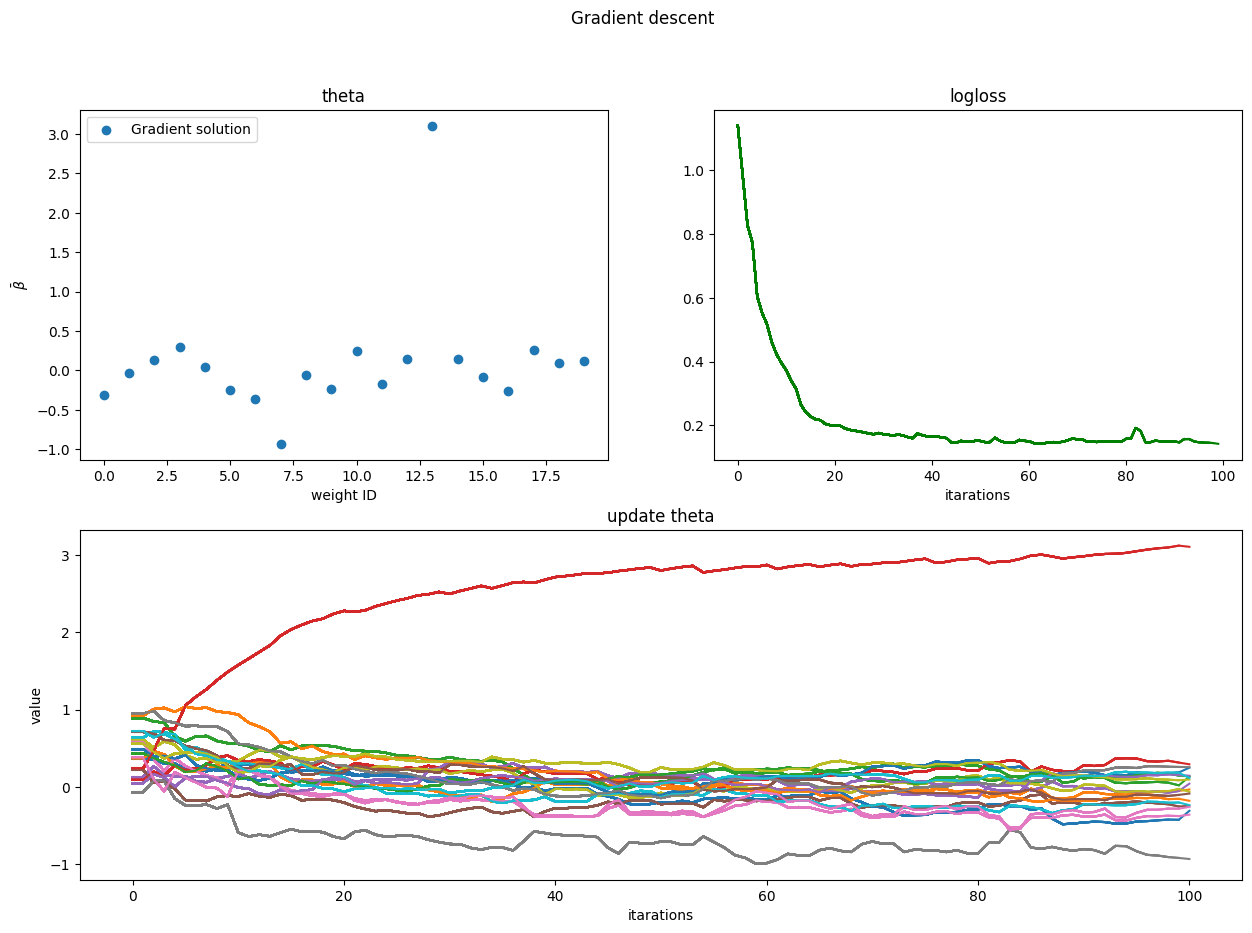

In [ ]:
optimal_theta = fit(X, y)

In [ ]:
optimal_theta

array([-0.30735864, -0.03163116,  0.13394346,  0.2936894 ,  0.0431177 ,
       -0.24303688, -0.35729918, -0.93077424, -0.06123864, -0.23450383,
        0.24993887, -0.17810212,  0.13941257,  3.10567457,  0.14612259,
       -0.08462031, -0.25687965,  0.25741138,  0.09670852,  0.11748219])

In [ ]:
y_pred = binary_class_prediction(optimal_theta, X)

#Scikit LogisticRegression

In [ ]:
lr = LogisticRegression(class_weight='balanced')

In [ ]:
params = {'C': np.linspace(0.01, 10, 10), 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'saga', 'sag']}
grid = GridSearchCV(lr, params, scoring = 'roc_auc', cv = 5)

In [ ]:
grid.fit(X_feat_train, y_feat_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'saga', 'sag']},
             scoring='roc_auc')

In [ ]:
grid.best_score_

0.8489720115677093

In [ ]:
grid.best_params_

{'C': 0.01, 'solver': 'newton-cg'}

In [ ]:
grid_best = grid.best_estimator_
grid_best.fit(X_feat_train_scaled, y_feat_train)
roc_auc_score(y_feat_test, grid_best.predict_proba(X_feat_test_scaled)[:, 1])

0.876110540828742

#Своя реализация LogisticRegression

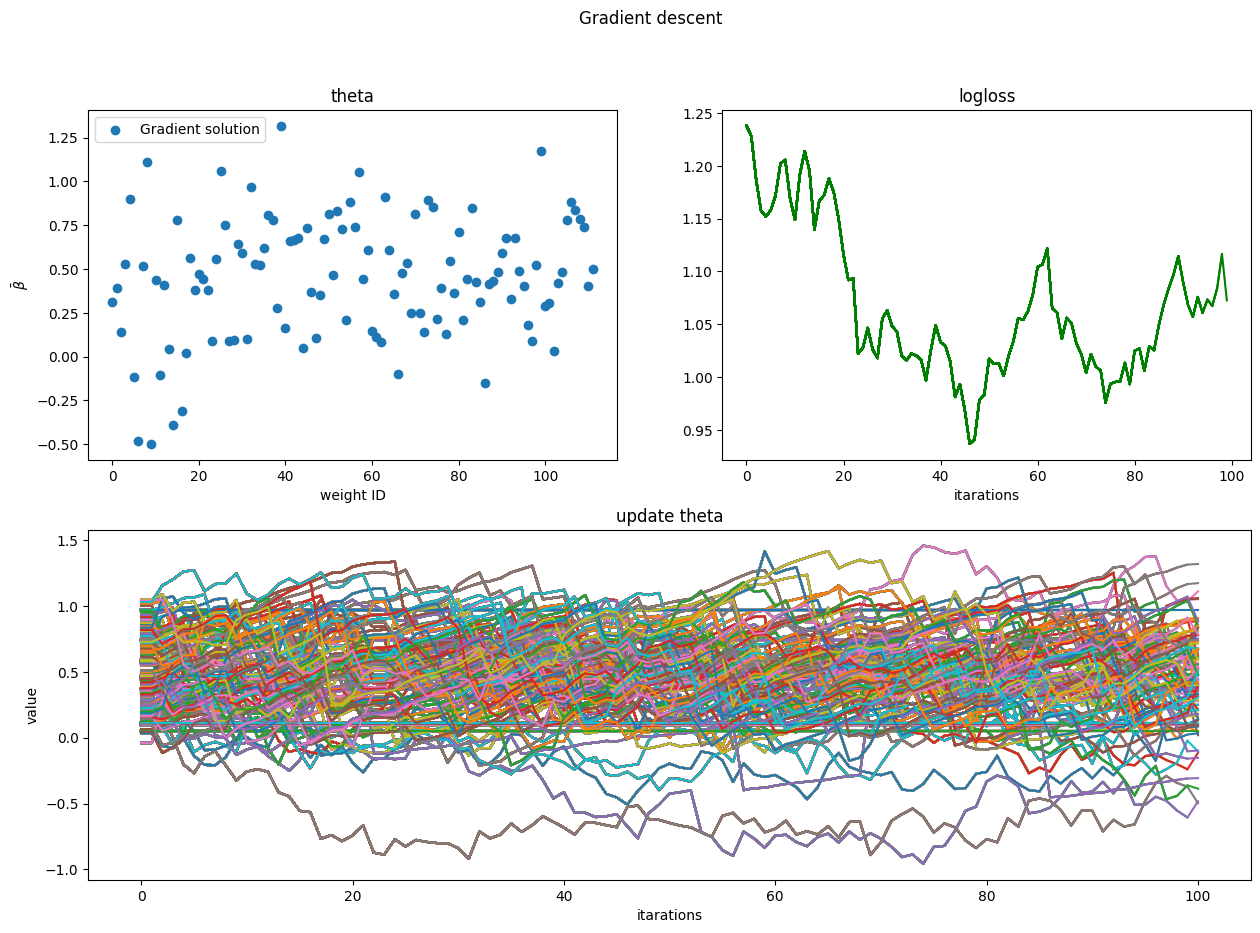

In [ ]:
optimal_theta = fit(X_feat_train_scaled, y_feat_train)

In [ ]:
y_proba = probability(optimal_theta, X_feat_test_scaled)

In [ ]:
roc_auc_score(y_feat_test, y_proba)

0.6821605430334345

#Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(weights = 'distance', p = 2)
params = {'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'n_neighbors' : np.arange(10, 30, 4)}
knn_grid = GridSearchCV(knn, params, cv = 5, scoring = 'roc_auc')

In [ ]:
knn_grid.fit(X_feat_train, y_feat_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([10, 14, 18, 22, 26])},
             scoring='roc_auc')

In [ ]:
knn_grid.best_score_

0.49383176165708215

In [ ]:
knn_grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 26}

In [ ]:
knn_grid_best = knn_grid.best_estimator_
knn_grid_best.fit(X_feat_train, y_feat_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=26, weights='distance')

In [ ]:
roc_auc_score(y_feat_test, knn_grid_best.predict_proba(X_feat_test)[:, 1])

0.453455214618292

#Naive Bayes

In [ ]:
clf = BernoulliNB(force_alpha=True)
params = {'alpha': np.linspace(0.01, 10, 10)}
clf_grid = GridSearchCV(clf, params, cv = 5, scoring = 'roc_auc')

In [ ]:
clf_grid.fit(X_feat_train, y_feat_train)

GridSearchCV(cv=5, estimator=BernoulliNB(force_alpha=True),
             param_grid={'alpha': array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ])},
             scoring='roc_auc')

In [ ]:
clf_grid.best_score_

0.6871877508629682

In [ ]:
clf_grid.best_params_

{'alpha': 10.0}

In [ ]:
clf_grid_best = clf_grid.best_estimator_
clf_grid_best.fit(X_feat_train, y_feat_train)
roc_auc_score(y_feat_test, clf_grid_best.predict_proba(X_feat_test)[:, 1])

0.7757296543286116

#Вывод

<h2>Модели, кроме KNN, имеют хороший показатель roc_auc_score.<br>
Результатам можно доверять, так как модели тестировались на данных, которые они ранее не видели.<br>
Лучший результат показала логистическая регрессия из пакета scikit learn.<br>
Важную роль играет правильная подготовка данных для обучения.</h2>